# Understanding Altair

In [23]:
import pandas as pd
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [4]:
data = pd.DataFrame({
    'a': list('CCCDDDEEE'),
    'b': [2,7,4,1,2,6,8,4,7]
})
print(data)

   a  b
0  C  2
1  C  7
2  C  4
3  D  1
4  D  2
5  D  6
6  E  8
7  E  4
8  E  7


In [5]:
# Defining the chart object
import altair as alt
chart = alt.Chart(data)

In [6]:
chart.mark_point()

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various encoding channels, or channels for short, to columns in the dataset. For example, we could encode the variable `a` of the data with the `x` channel, which represents the x-axis position of the points. 

This can be done straightforwardly via the `Chart.encode()` method:

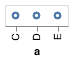

In [7]:
alt.Chart(data).mark_point().encode(
    x='a'
)

The `encode()` method builds a key-value mapping between encoding channels (such as `x`, `y`, `color`, `shape`, `size`, etc.) to columns in the dataset, accessed by column name.

For pandas dataframes, Altair automatically determines the appropriate data type for the mapped column, which in this case is a nominal value, or an unordered categorical.

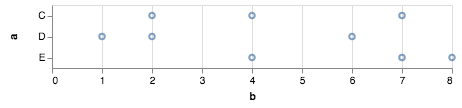

In [8]:
alt.Chart(data).mark_point().encode(
    x='b',
    y='a'
)

Altair has inferred in its encoding process the type of columns it is working with. It identify `a` as an unordered categorical column and `b` as a quantitative type.

# Aggregation

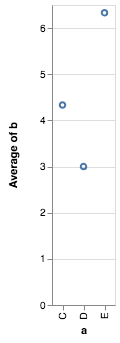

In [10]:
alt.Chart(data).mark_point().encode(
    x='a',
    y='average(b)'
)

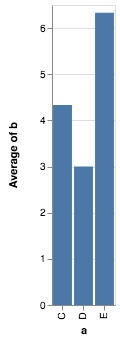

In [11]:
alt.Chart(data).mark_bar().encode(
    x='a',
    y='average(b)'
)

## Examining the JSON using `to.json()`

In [12]:
chart = alt.Chart(data).mark_bar().encode(
    x = 'a',
    y = 'average(b)'
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-347f1284ea3247c0f55cb966abbdd2d8"
  },
  "datasets": {
    "data-347f1284ea3247c0f55cb966abbdd2d8": [
      {
        "a": "C",
        "b": 2
      },
      {
        "a": "C",
        "b": 7
      },
      {
        "a": "C",
        "b": 4
      },
      {
        "a": "D",
        "b": 1
      },
      {
        "a": "D",
        "b": 2
      },
      {
        "a": "D",
        "b": 6
      },
      {
        "a": "E",
        "b": 8
      },
      {
        "a": "E",
        "b": 4
      },
      {
        "a": "E",
        "b": 7
      }
    ]
  },
  "encoding": {
    "x": {
      "field": "a",
      "type": "nominal"
    },
    "y": {
      "aggregate": "average",
      "field": "b",
      "type": "quantitative"
    }
  },
  "mark": "bar"
}


Notice here that `encode(x='a')` has been expanded to a JSON structure with a `field` name, and a `type` for the data. The `encode(y='b')` has been expanded similarly and includes an `aggregate` field.

We can use the more verbose way of specifying channels:

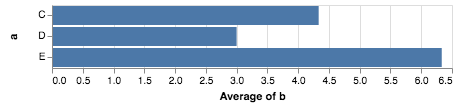

In [13]:
alt.Chart(data).mark_bar().encode(
    alt.Y('a', type='nominal'),
    alt.X('b', type='quantitative', aggregate='average')
)

Which has the same effect as the more concise form:

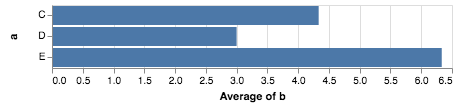

In [15]:
alt.Chart(data).mark_bar().encode(
    y='a:N',
    x='average(b):Q'
)

# Customization

We can specify the axis titles using the `axis` attribute of channel classes, and we can specify the color of the marking by setting the `color` keyword of the `Chart.mark_*` methods to any valid HTML color string:

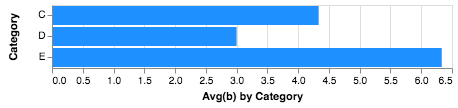

In [17]:
alt.Chart(data).mark_bar(color='dodgerblue').encode(
    alt.Y('a', axis=alt.Axis(title='Category')),
    alt.X('average(b)', axis=alt.Axis(title='Avg(b) by Category'))
)

In [22]:
chart = alt.Chart(data).mark_bar(color='firebrick').encode(
    alt.Y('a', axis=alt.Axis(title='Category')),
    alt.X('average(b):Q', axis=alt.Axis(title='Avg(b) by Category'))
)
chart.save('chart.html')

# Experiments

In [24]:
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


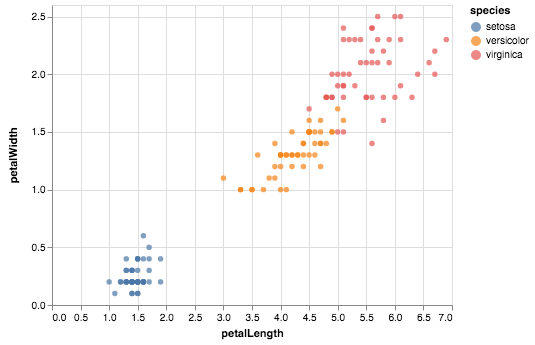

In [123]:
import altair as alt
alt.Chart(iris).mark_circle().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [121]:
from vega_datasets import data
cars = data.cars()
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


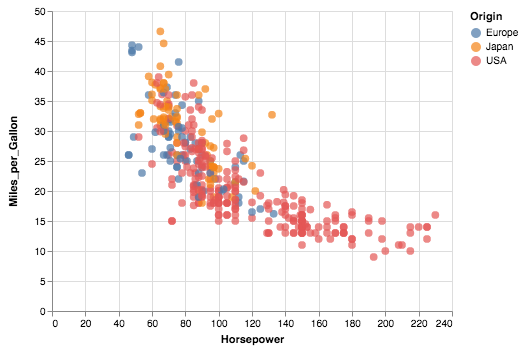

In [32]:
alt.Chart(cars).mark_circle(size=60).encode(
    x = 'Horsepower',
    y = 'Miles_per_Gallon',
    color = 'Origin',
    tooltip = ['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

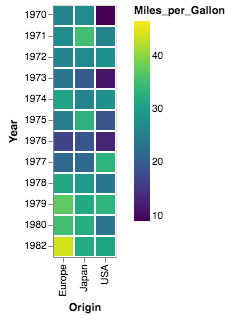

In [94]:
# making Year variable ordinal (categorical)
cars['Year'] = cars['Year'].dt.year

alt.Chart(cars).mark_rect().encode(
    x='Origin:O',
    y='Year:O',
    color='Miles_per_Gallon:Q'
)

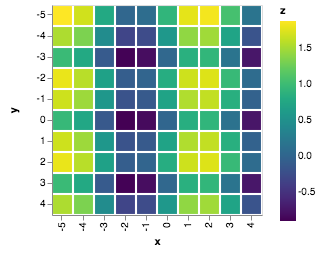

In [154]:
import numpy as np
# Compute sin(x) + sin(y)^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = np.sin(x) + np.sin(y) ** 2

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(data).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

In [153]:
data

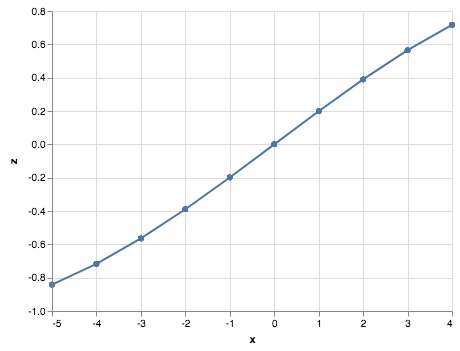

In [160]:
data['z'] = np.sin(data['x']/5)

alt.Chart(data).mark_line(point=True).encode(
    x='x',
    y='z'
)

In [137]:
movies = data.movies()

In [131]:
movies

Index(['Creative_Type', 'Director', 'Distributor', 'IMDB_Rating', 'IMDB_Votes',
       'MPAA_Rating', 'Major_Genre', 'Production_Budget', 'Release_Date',
       'Rotten_Tomatoes_Rating', 'Running_Time_min', 'Source', 'Title',
       'US_DVD_Sales', 'US_Gross', 'Worldwide_Gross'],
      dtype='object')

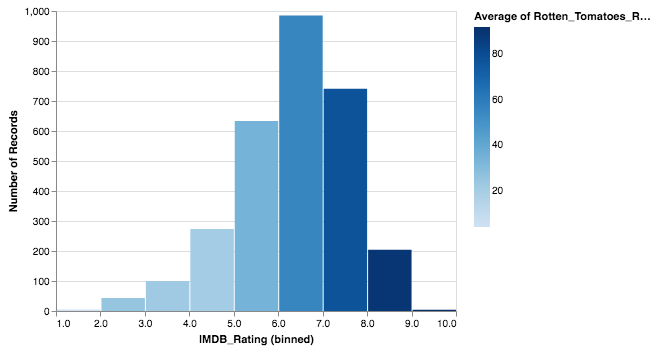

In [150]:
alt.Chart(movies).mark_bar().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('count()'),
    fill = 'average(Rotten_Tomatoes_Rating)'
)

In [181]:
movies['Release_DateTime'] = pd.to_datetime(movies['Release_Date'], errors='coerce')
movies['Release_DateTime'].head()

0   1998-06-12
1   1998-08-07
2   1998-08-28
3   1998-09-11
4   1998-10-09
Name: Release_DateTime, dtype: datetime64[ns]

In [191]:
movies['Release_DateTime'].describe()

count                    3194
unique                   1598
top       2002-10-11 00:00:00
freq                        9
first     1929-01-01 00:00:00
last      2067-12-29 00:00:00
Name: Release_DateTime, dtype: object

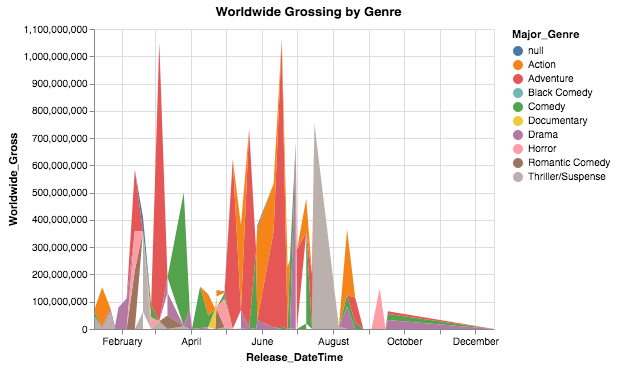

In [212]:
alt.Chart(movies[(movies['Release_DateTime'] > '2010-01-01') 
                 & (movies['Release_DateTime'] < '2010-12-31')]).mark_area().encode(
    x="Release_DateTime:T",
    y="Worldwide_Gross:Q",
    color="Major_Genre:N"
).properties(
    title='Worldwide Grossing by Genre'
)

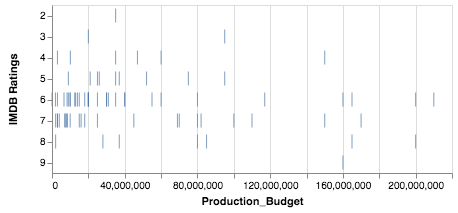

In [233]:
movies['IMDB_R'] = np.floor(movies['IMDB_Rating'])

alt.Chart(movies[(movies['Release_DateTime'] > '2010-01-01') 
                 & (movies['Release_DateTime'] < '2010-12-31')].dropna(
    subset=['IMDB_R'])).mark_tick().encode(
        x='Production_Budget',
        y=alt.Y('IMDB_R', type='ordinal', title='IMDB Ratings')
)